# Tutorial 3 - Graph Machine Learning Libraries

In this tutorial we will explore one of the popular Graph ML Libraries called _"Deep Graph Library"_ - https://www.dgl.ai/dgl_docs/

There are other options - like PyG (https://www.pyg.org).

We will try all three tasks of Graph ML
 1) Node Classification
 2) Graph Classification
 3) Link Prediction

## Installation


**HINT** If you want to keep your main python environment free from unnecessary clutter of libraries, I strongly advise to use  either Conda or Virtual Environments :).

If you decide to go with Conda (see https://docs.conda.io/en/latest/miniconda.html#latest-miniconda-installer-links) for installation instructions), first create an environment from terminal and activate it:
```
conda create -n gnn_t3 python=3.12
conda activate gnn_t3
```

And when you have your environment up and running, use following to install core dependancies:

```
pip3 install jupyter torch==2.4 pandas scikit-learn numpy pyvis      
```

DGL library has it's own installation guide on https://www.dgl.ai/pages/start.html .

On linux with CUDA, the installation can be done by running:
```
conda install -c dglteam/label/th24_cu124 dgl
```

On MAC OS you need to bild the package from source code and I'd just recommend to use Google Colab.


In [ ]:
! pip3 install torch==2.4 pandas scikit-learn numpy pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install  dgl -f https://data.dgl.ai/wheels/torch-2.4/repo.html
# !pip install dgl -f https://data.dgl.ai/wheels/cu124/torch-2.4/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.4/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.4 MB/s eta 0:00:00
Discarding https://data.dgl.ai/wheels/torch-2.4/dgl-2.5.0-cp311-cp311-manylinux1_x86_64.whl (from https://data.dgl.ai/wheels/torch-2.4/repo.html): Requested dgl from https://data.dgl.ai/wheels/torch-2.4/dgl-2.5.0-cp311-cp311-manylinux1_x86_64.whl has inconsistent version: expected '2.5.0', but metadata has '2.5.0+cpu'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.0 MB/s eta 0:00:00


In [ ]:
import os
os.environ['DGLBACKEND'] = 'pytorch'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import dgl
import dgl.data as ddta
import dgl.nn as dnn

import numpy as np
import scipy.sparse as sp
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

import pyvis.network as pyv_n

import itertools

import matplotlib.pyplot as plt

# HOMEWORK

Create a notebook exploring one of the tasks shown above with a dataset directly available in DGL library. In your homework focus on experimenting with impact of vector representation convolution type/architecture and type of classifier on accuracy of the result. Document your finding with described and visualised results. Document behaviour/improvements of your architectures on specific examples.

In [ ]:
# load the Citeseer citation network dataset
dataset = dgl.data.AmazonCoBuyComputerDataset()
graph = dataset[0]

labels = graph.ndata['label']
# train_mask = graph.ndata['train_mask']
# test_mask = graph.ndata['test_mask']

/root/.dgl/amazon_co_buy_computer.zip:   0%|          | 0.00/3.42M [00:00<?, ?B/s]

Extracting file to /root/.dgl/amazon_co_buy_computer_b5999b2e


In [ ]:
train_mask = torch.zeros(graph.num_nodes(), dtype=torch.bool)
test_mask = torch.zeros(graph.num_nodes(), dtype=torch.bool)
num_nodes = graph.num_nodes()
num_train = int(num_nodes * 0.8)
train_indices = torch.randperm(num_nodes)[:num_train]
test_indices = torch.tensor(list(set(range(num_nodes)) - set(train_indices.tolist())))

train_mask[train_indices] = True
test_mask[test_indices] = True

graph.ndata['train_mask'] = train_mask
graph.ndata['test_mask'] = test_mask

In [ ]:
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes, aggregator_type='mean', num_layers=2):
        super(GraphSAGE, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        if num_layers == 1:
            self.layers.append(dnn.SAGEConv(in_feats, num_classes, aggregator_type))
        else:
            self.layers.append(dnn.SAGEConv(in_feats, hidden_size, aggregator_type))
            for _ in range(num_layers - 2):
                self.layers.append(dnn.SAGEConv(hidden_size, hidden_size, aggregator_type))
            self.layers.append(dnn.SAGEConv(hidden_size, num_classes, aggregator_type))

    def forward(self, g, features):
        h = features
        for i in range(self.num_layers - 1):
            h = self.layers[i](g, h)
            h = F.relu(h)
        h = self.layers[-1](g, h)
        return h

class GATModel(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes, num_heads=4):
        super(GATModel, self).__init__()
        self.gat1 = dnn.GATConv(in_feats, hidden_size, num_heads)
        self.gat2 = dnn.GATConv(hidden_size * num_heads, num_classes, 1)

    def forward(self, g, features):
        h = self.gat1(g, features)
        h = h.flatten(1)
        h = F.elu(h)
        h = self.gat2(g, h)
        h = h.mean(1)
        return h

In [ ]:
def evaluate_model(model, graph, attributes, labels, test_mask):
    model.eval()
    with torch.no_grad():
        probabilities = model(graph, attributes)
        predictions = probabilities.argmax(1)
        acc = (predictions[test_mask] == labels[test_mask]).float().mean().item()
    return acc

def train_and_evaluate(model, g, features, labels, train_mask, _, test_mask,
                       epochs=500, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        logits = model(g, features)
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_acc = evaluate_model(model, g, features, labels, train_mask)
        test_acc = evaluate_model(model, g, features, labels, test_mask)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    max_train_accuracies = [max(train_accuracies[:i+1]) for i in range(len(train_accuracies))]
    max_test_accuracies = [max(test_accuracies[:i+1]) for i in range(len(test_accuracies))]

    plt.figure(figsize=(10, 6))
    plt.plot(max_train_accuracies, label='Train Acc')
    plt.plot(max_test_accuracies, label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return max_train_accuracies[-1], max_test_accuracies[-1]

In [ ]:
features = graph.ndata['feat']

Training GraphSAGE with aggregator 'mean' and 2 layers


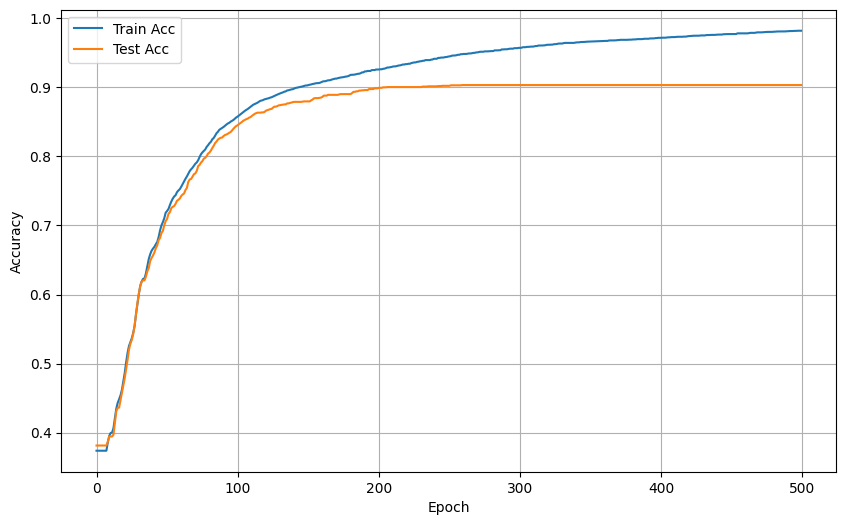

Training GraphSAGE with aggregator 'gcn' and 2 layers


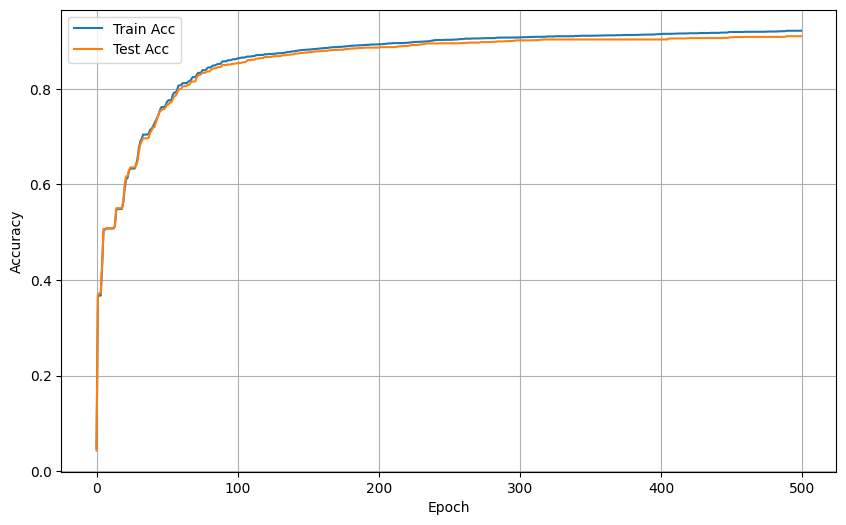

Training GraphSAGE with aggregator 'pool' and 2 layers


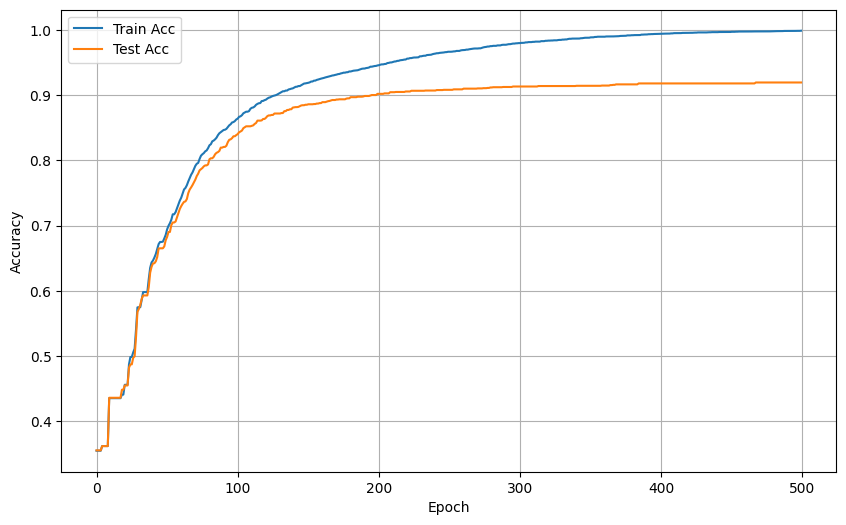

In [ ]:
# Experiment 1: Different Aggregators
aggregator_combinations = [('mean', 2), ('gcn', 2), ('pool', 2)]
aggregator_results = []

for agg, layers in aggregator_combinations:
    print(f"Training GraphSAGE with aggregator '{agg}' and {layers} layers")
    model = GraphSAGE(in_feats=features.shape[1], hidden_size=64, num_classes=dataset.num_classes, aggregator_type=agg, num_layers=layers)
    results = train_and_evaluate(model, graph, features, labels, train_mask, None, test_mask)
    aggregator_results.append((agg, layers, results))


Training GraphSAGE with 1 layers


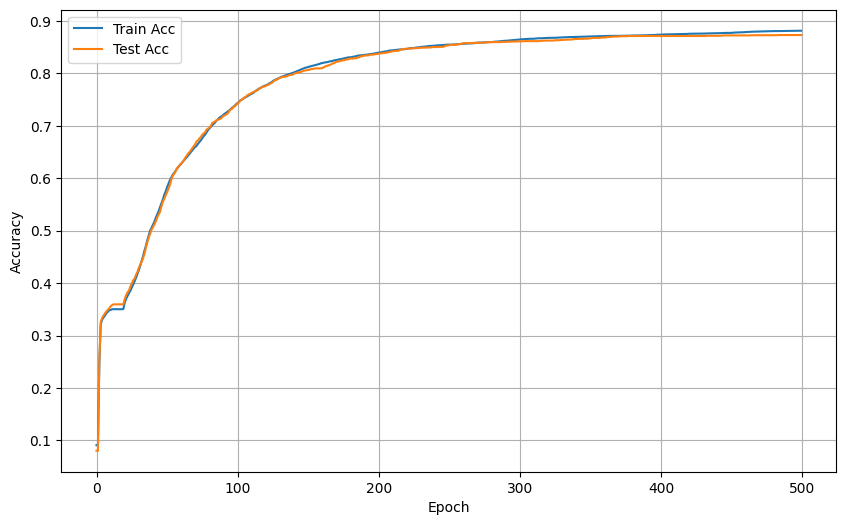

Training GraphSAGE with 2 layers


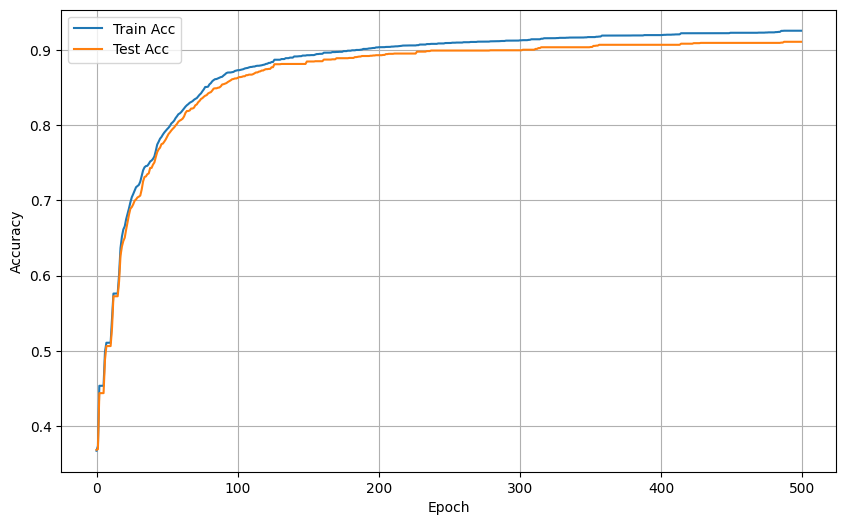

Training GraphSAGE with 3 layers


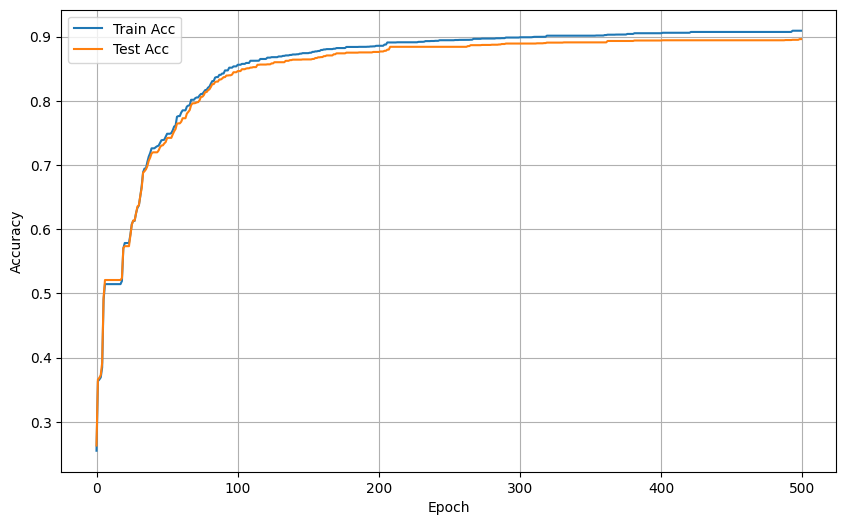

In [ ]:
# Experiment 2: Different Layer Numbers
layer_configs = [1, 2, 3]
layer_results = []

for layers in layer_configs:
    print(f"Training GraphSAGE with {layers} layers")
    model = GraphSAGE(in_feats=features.shape[1], hidden_size=64,
                      num_classes=dataset.num_classes, aggregator_type='gcn',
                      num_layers=layers)
    results = train_and_evaluate(model, graph, features, labels, train_mask,
                                 None, test_mask)
    layer_results.append((layers, results))

Training GraphSAGE with hidden size 16


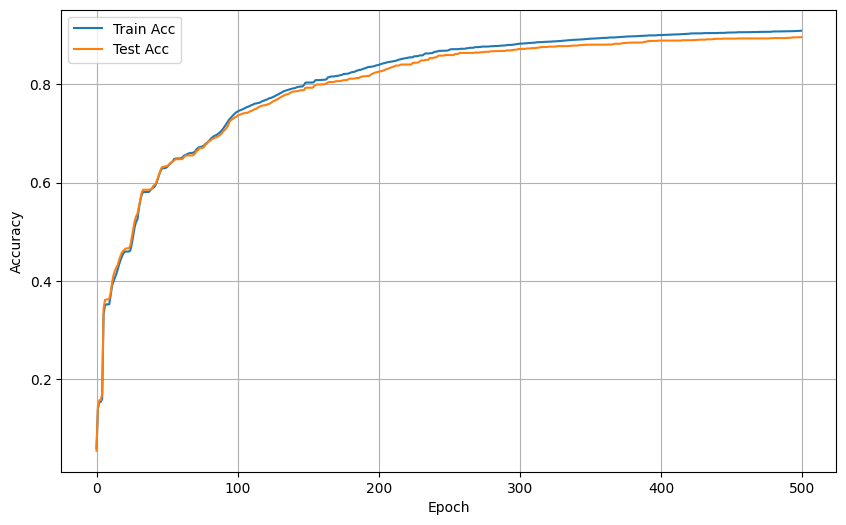

Training GraphSAGE with hidden size 32


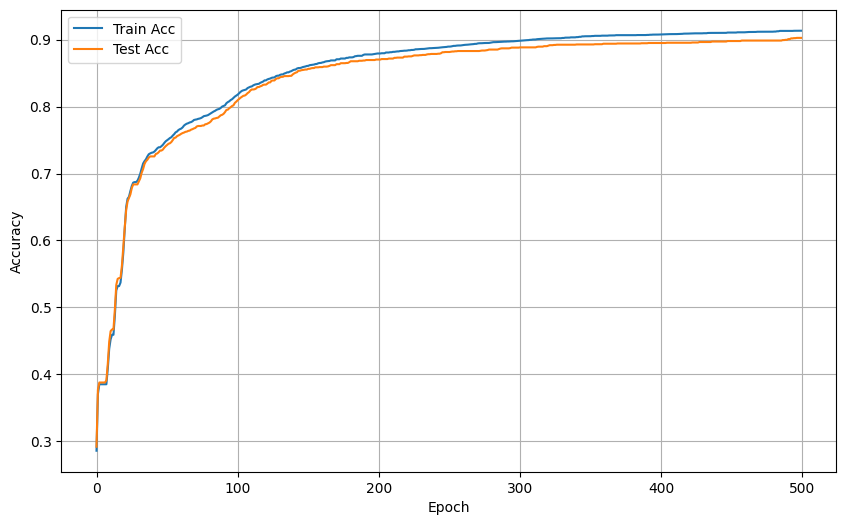

Training GraphSAGE with hidden size 64


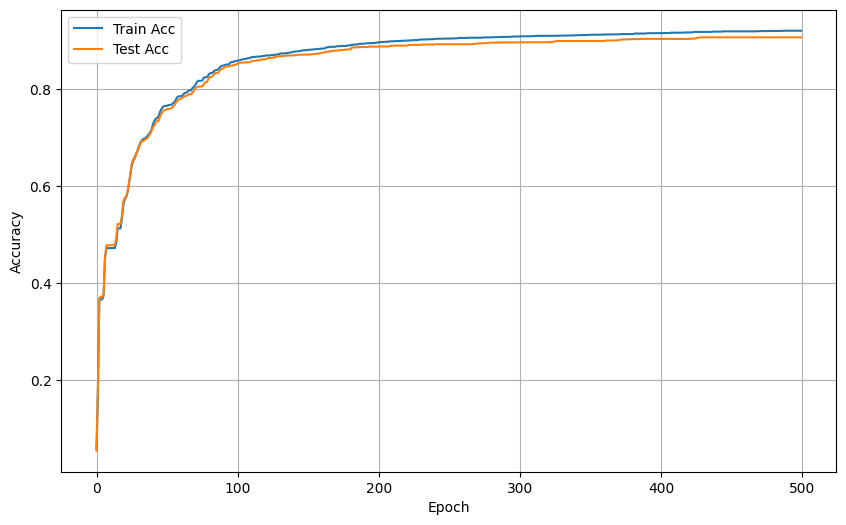

Training GraphSAGE with hidden size 128


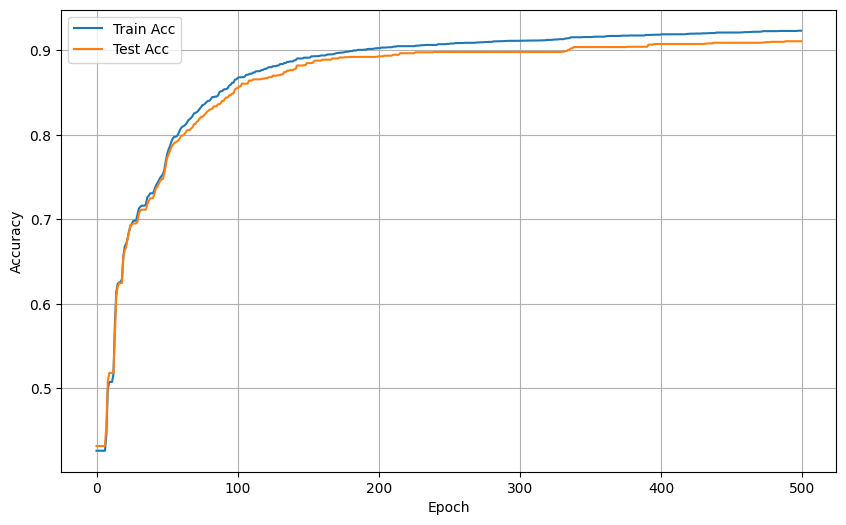

Training GraphSAGE with hidden size 256


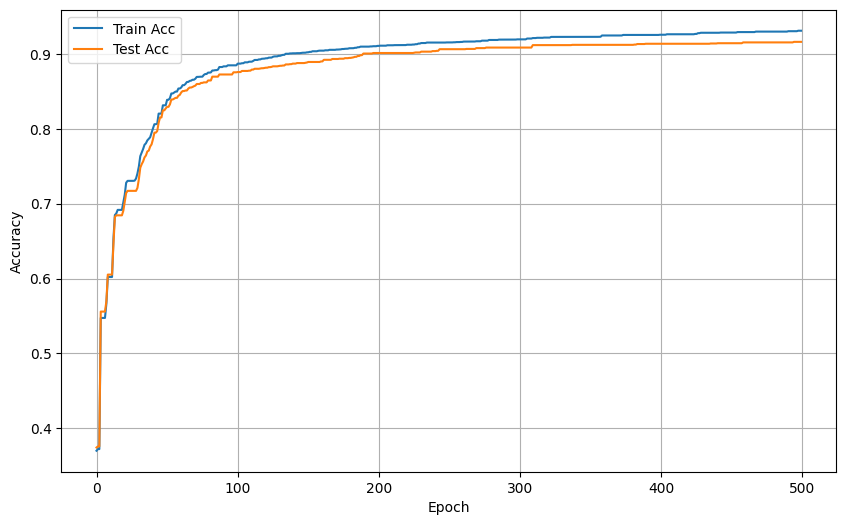

Training GraphSAGE with hidden size 512


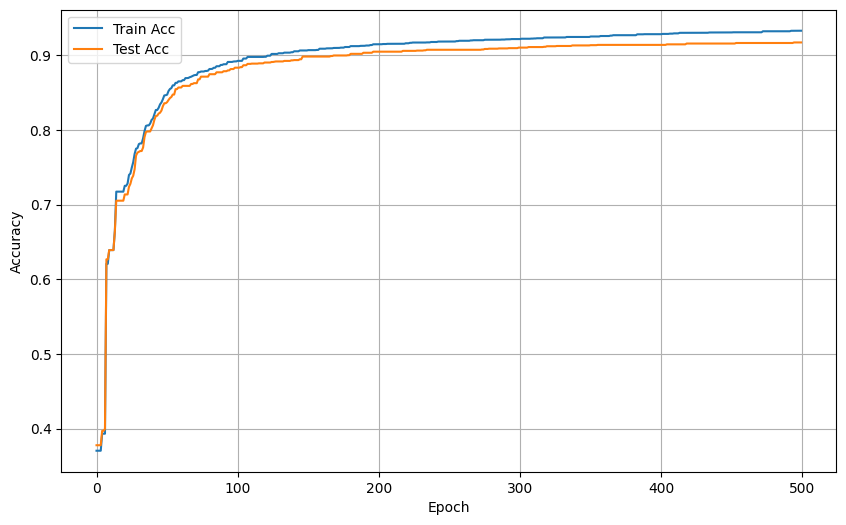

In [ ]:
# Experiment 3: Hidden Dimensions
hidden_sizes = [16, 32, 64, 128, 256, 512]
hidden_results = []

for hidden_size in hidden_sizes:
    print(f"Training GraphSAGE with hidden size {hidden_size}")
    model = GraphSAGE(in_feats=features.shape[1], hidden_size=hidden_size, num_classes=dataset.num_classes, aggregator_type='gcn', num_layers=2)
    results = train_and_evaluate(model, graph, features, labels, train_mask, None, test_mask)
    hidden_results.append((hidden_size, results))

In [ ]:
# # Experiment 4: GAT
# gat_model = GATModel(in_feats=features.shape[1], hidden_size=8, num_classes=dataset.num_classes, num_heads=4)
# gat_results = train_and_evaluate(gat_model, graph, features, labels, train_mask, None, test_mask)

DGLError: There are 0-in-degree nodes in the graph, output for those nodes will be invalid. This is harmful for some applications, causing silent performance regression. Adding self-loop on the input graph by calling `g = dgl.add_self_loop(g)` will resolve the issue. Setting ``allow_zero_in_degree`` to be `True` when constructing this module will suppress the check and let the code run.

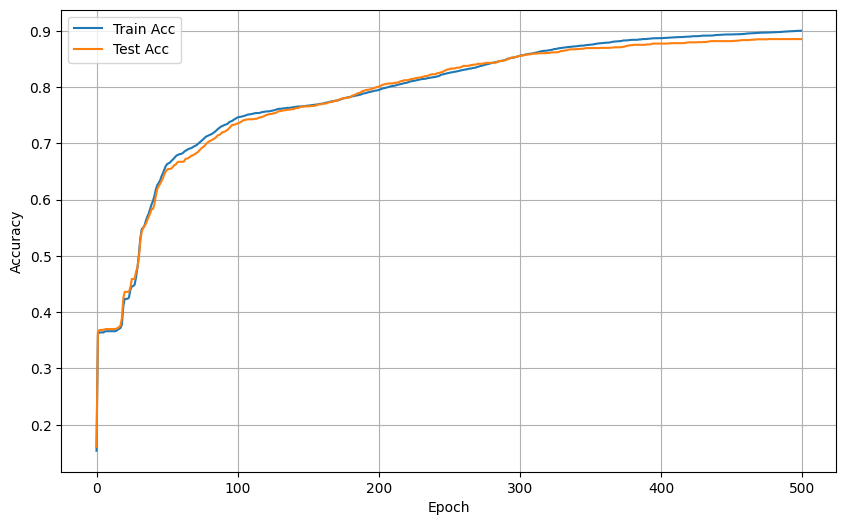

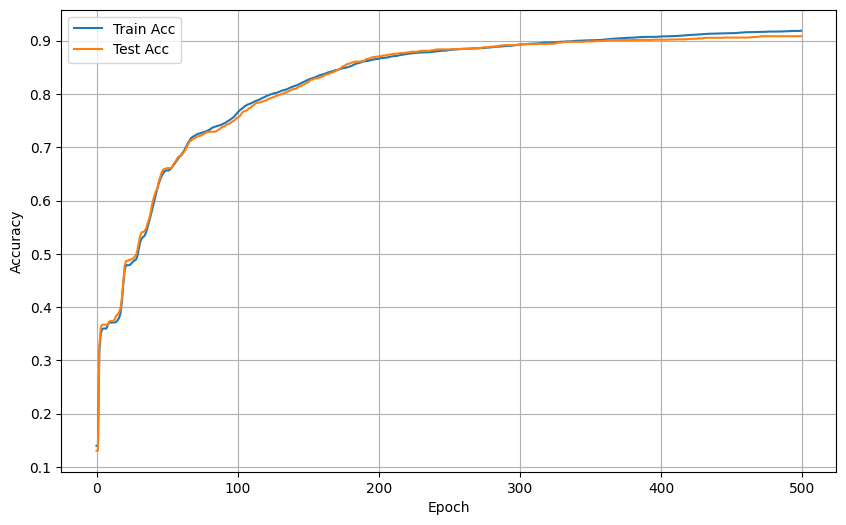

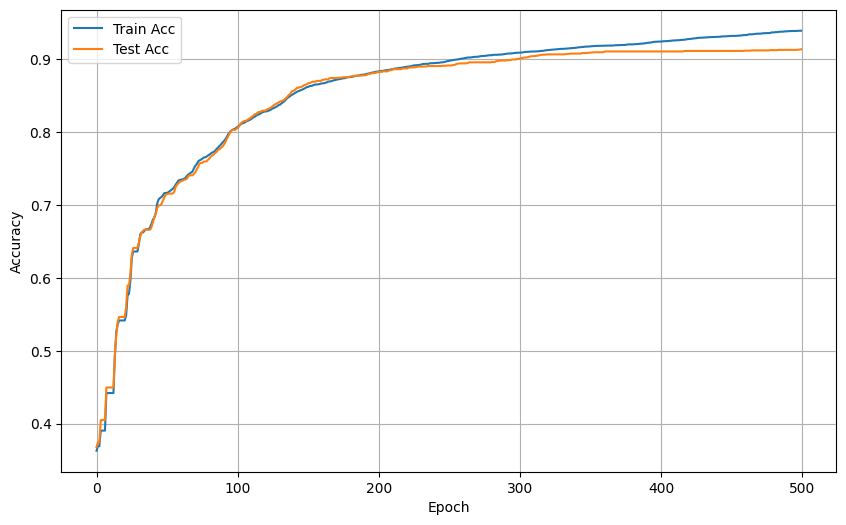

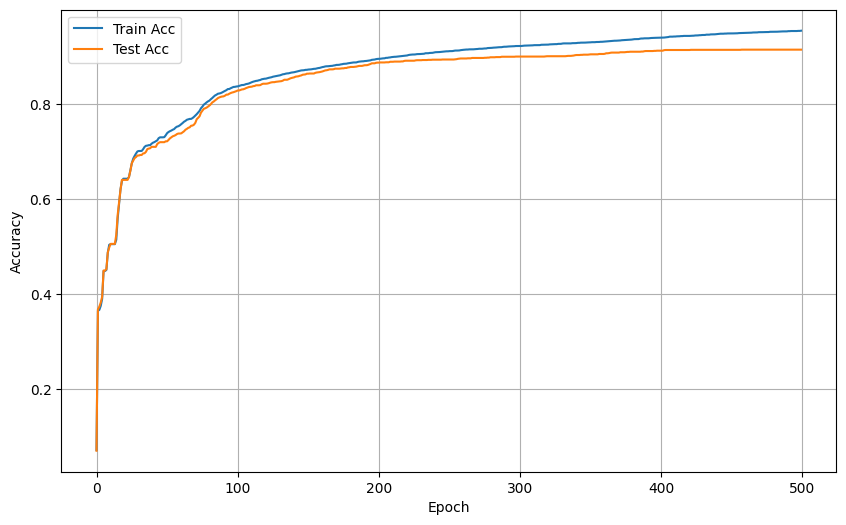

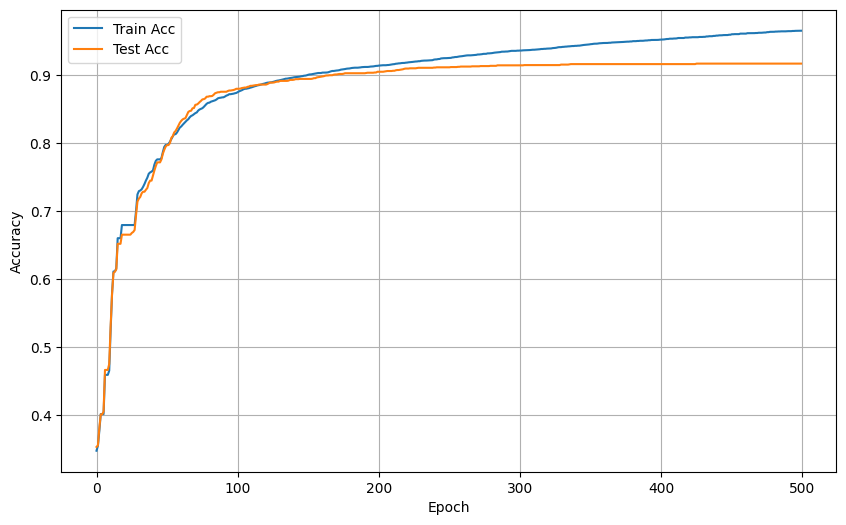

In [ ]:
# Experiment 4: GAT
possible_heads = [1, 2, 4, 8, 16]
gat_results = []
for heads in possible_heads:
    graph_with_self_loops = dgl.add_self_loop(graph)
    gat_model = GATModel(in_feats=features.shape[1], hidden_size=64, num_classes=dataset.num_classes, num_heads=heads)
    train_and_evaluate(gat_model, graph_with_self_loops, features, labels, train_mask, None, test_mask)

In [ ]:
print("Aggregator Type Results:")
for agg, layers, result in aggregator_results:
    print(f"Aggregator: {agg} (2 layers), train: {result[0]:.4f}, test: {result[1]:.4f}")

print("Layer Number Results:")
for layers, result in layer_results:
    print(f"layers: {layers}, train: {result[0]:.4f}, test: {result[1]:.4f}")

print("Hidden Size Results:")
for hidden_size, result in hidden_results:
    print(f"hidden size: {hidden_size}, train: {result[0]:.4f}, test: {result[1]:.4f}")

print("GAT Results:")
for heads, result in gat_results:
    print(f"heads: {heads}, train: {result[0]:.4f}, test: {result[1]:.4f}")

Aggregator Type Results:
Aggregator: mean (2 layers), train: 0.9820, test: 0.9033
Aggregator: gcn (2 layers), train: 0.9216, test: 0.9102
Aggregator: pool (2 layers), train: 0.9991, test: 0.9197
Layer Number Results:
layers: 1, train: 0.8814, test: 0.8731
layers: 2, train: 0.9253, test: 0.9106
layers: 3, train: 0.9091, test: 0.8960
Hidden Size Results:
hidden size: 16, train: 0.9092, test: 0.8960
hidden size: 32, train: 0.9133, test: 0.9026
hidden size: 64, train: 0.9198, test: 0.9062
hidden size: 128, train: 0.9230, test: 0.9106
hidden size: 256, train: 0.9313, test: 0.9164
hidden size: 512, train: 0.9328, test: 0.9171
GAT Results:


In [ ]:
gat_results

(0.9535496830940247, 0.9171210527420044)